# 2. Importing Required Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 3. Reading Dataset

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 4. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()

1081

In [9]:
df_copy = df.copy()

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

# 5. Few Visuals

<Axes: >

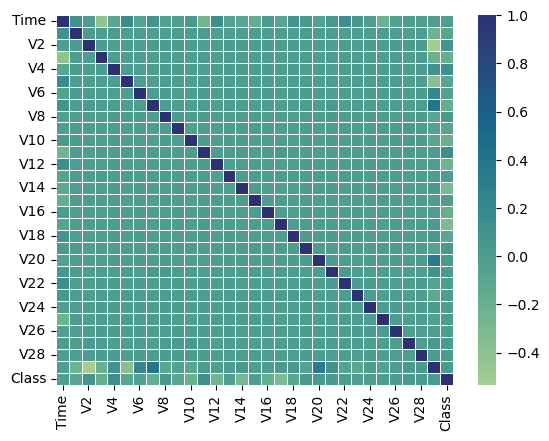

In [12]:
sns.heatmap(df.corr(), cmap = 'crest', linewidth=.5)

In [13]:
df.corr()['Class']

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

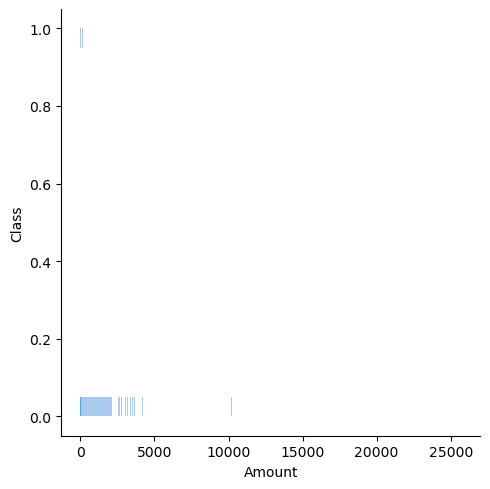

In [14]:
sns.displot(data = df, x = 'Amount', y = 'Class')

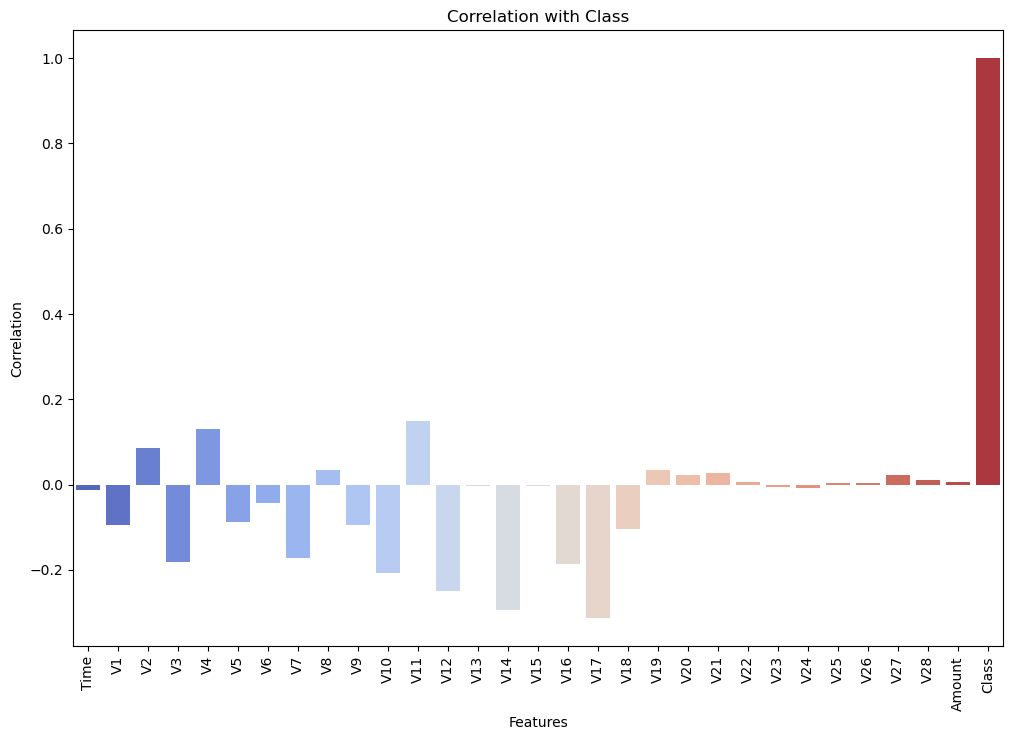

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [16]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: ylabel='Class'>

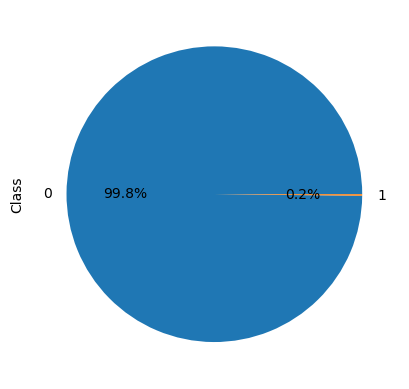

In [17]:
df['Class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

# 6. Modelling

In [18]:
x = df.drop(columns=['Class'])
y = df['Class']

In [19]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [20]:
print(x_sm.shape)
print(y_sm.shape)

(566506, 30)
(566506,)


In [21]:
scaler = StandardScaler()

In [22]:
x_scaled = scaler.fit_transform(x_sm)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_sm, test_size=0.25, random_state=1)

### Logistic Regression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
pred_lr = lr.predict(X_test)

In [27]:
score_lr = accuracy_score(y_test, pred_lr)

In [28]:
score_lr

0.9795236783946564

In [29]:
report_lr = classification_report(y_test, pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     70748
           1       0.99      0.97      0.98     70879

    accuracy                           0.98    141627
   macro avg       0.98      0.98      0.98    141627
weighted avg       0.98      0.98      0.98    141627



In [30]:
lr_matrix = confusion_matrix(y_test, pred_lr)

<Axes: >

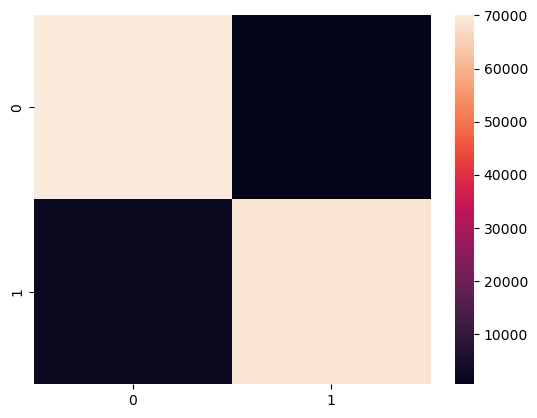

In [31]:
sns.heatmap(lr_matrix)

### Random Forest Classifier

In [32]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
pred_rfc = rfc.predict(X_test)

In [ ]:
score_rfc = accuracy_score(y_test, pred_rfc)
print(score_rfc)

In [ ]:
rfc_report = classification_report(y_test, pred_rfc)
print(rfc_report)

### Decision Tree 

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
pred_dtc = dtc.predict(X_test)

In [ ]:
score_dtc = accuracy_score(y_test, pred_dtc)
print(score_dtc)

In [ ]:
report_dtc = classification_report(y_test, pred_dtc)
print(report_dtc)

In [ ]:
d = {'Models': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy' : ['97.87%','99.98%', '99.82%']
    }

In [ ]:
result = pd.DataFrame(d)


# 7. Conclusion

In [ ]:
result